Implement the algorithm that computes the closest/further point of an ellipse with respect to a given 2D point. The input of the method is a 2D point, represented by coordinates u and v. 

The programing language is arbitrary, feel free to select the optimal environment for the development & testing. 

 

The scoring of the assignment is as follows: 

Generate random ellipse parameters (2 points) and draw the ellipse and the randomly selected 2D point. (2 points) 
Develop the method (9 points) based on the description on the subject’s webpage. All the method if the user presses a key. 
Insert the closest/further points and the corresponding line segments into your plot (2 points). 

Ellipse Parameters:A=0.9229, B=2.3411, C=0.0163, D=3.2725, E=-1.3356, F=-7.1283
Random Point: (3.441346709837145, 9.191433697766975)


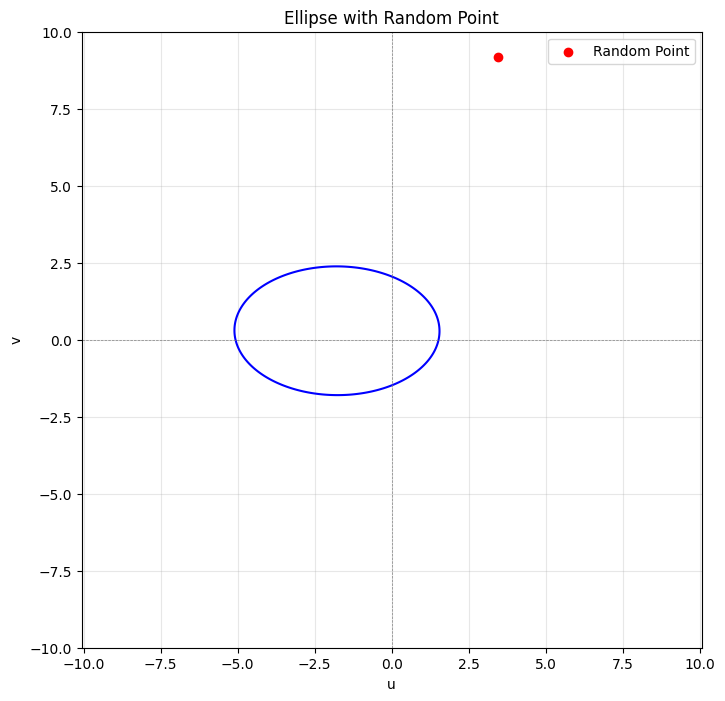

λ_solutions: [ 1.8136464  -3.27408106  1.8136464   1.8136464 ]
Closest Point and distance: (0.16622057026681333, 1.982503433829713) 7.918025434438022
Farthest Point and distance: (-4.338381870599878, -1.033665433525446) 12.848222796559284


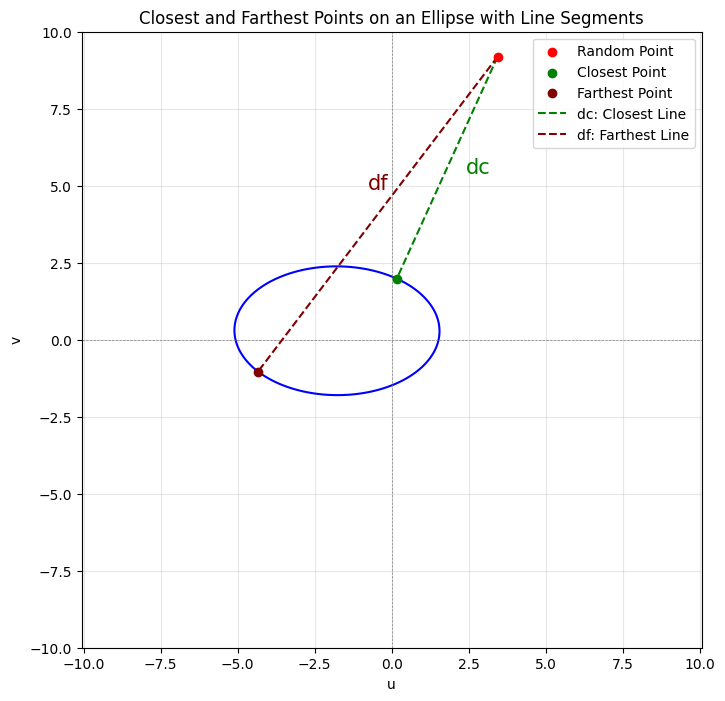

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root


"""""""""""""""""""""""""""""""""""""""""STEP1: Generate random ellipse parameters and draw the ellipse and the randomly selected 2D point."""
# Function to generate random ellipse parameters
def generate_random_ellipse_parameters():
    """
    Generates random parameters for a quadratic equation of an ellipse:
        A*u^2 + B*v^2 + C*u*v + D*u + E*v + F = 0
    The parameters ensure the ellipse has a larger vertical axis with minimal tilt.
    """
    A = np.random.uniform(0.5, 1.5)  # Horizontal axis (smaller spread for u^2)
    B = np.random.uniform(1, 3)      # Vertical axis (larger spread for v^2)
    C = np.random.uniform(-0.1, 0.1) # Small tilt value (near upright ellipse)
    D = np.random.uniform(-5, 5)     # Horizontal shift of the ellipse
    E = np.random.uniform(-3, 3)     # Vertical shift of the ellipse
    F = np.random.uniform(-20, -5)   # finite size of the ellipse 
    return A, B, C, D, E, F

# Function to generate a random point outside the ellipse
def generate_random_point_outside_ellipse(A, B, C, D, E, F):
    """
    Generates a random point (u, v) that lies outside the ellipse.
    """
    while True:  # Keep generating points until one lies outside the ellipse
        u = np.random.uniform(-10, 10)  # Random u-coordinate
        v = np.random.uniform(-10, 10)  # Random v-coordinate
        ellipse_value = A * u**2 + B * v**2 + C * u * v + D * u + E * v + F
        if ellipse_value > 0:  # Check if the point lies outside the ellipse
            print("Random Point:", (u, v))
            return u, v
         
# Plot the ellipse and random point
def plot_ellipse_with_random_point(A, B, C, D, E, F, x0):
    # Create a grid for plotting the ellipse
    u = np.linspace(-10, 10, 400)
    v = np.linspace(-10, 10, 400)
    U, V = np.meshgrid(u, v)
    ellipse_equation = A * U**2 + B * V**2 + C * U * V + D * U + E * V + F
    
    # Plot the ellipse
    plt.figure(figsize=(8, 8))
    plt.contour(U, V, ellipse_equation, levels=[0], colors="blue")
    plt.axhline(0, color="gray", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="gray", linewidth=0.5, linestyle="--")
    
    plt.scatter(u0, v0, color="red", label="Random Point", zorder=5)
    


    plt.title("Ellipse with Random Point")
    plt.xlabel("u")
    plt.ylabel("v")
    plt.axis('equal')
    # Save the plot to a file
    plt.savefig("Ellipse_with_Random_Point", dpi=300)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
 


"""STEP2: Develop the method based on the description on the subjects webpage. All the method if the user presses a key."""

# Function to calculate the closest and farthest points
def closest_and_farthest_points_on_ellipse(A, B, C, D, E, F, u0, v0):
    """
    Calculate the closest and farthest points on an ellipse to a given point (u0, v0).
    
    Parameters:
        A, B, C, D, E, F: Ellipse coefficients (Au^2 + Bv^2 + Cuv + Du + Ev + F = 0)
        u0, v0: Coordinates of the given point
    
    Returns:
        closest_point: Closest point (u, v) on the ellipse
        farthest_point: Farthest point (u, v) on the ellipse
    """
    # Define M̃, a, and related coefficients
    M_tilde = np.array([[A, C / 2], [C / 2, B]]) # Matrix M̃
    a = np.array([D / 2, E / 2]) # Vector a
    
    # Define helper functions for the polynomial terms
    def P2_1(λ):
        """Polynomial term P2_1 based on λ."""
        return (E * C / 4 - D * B / 2) * λ**2 + (B * u0 - D / 2 - C * v0 / 2) * λ + u0
    
    def P2_2(λ):
        """Polynomial term P2_2 based on λ."""
        return (D * C / 4 - E * A / 2) * λ**2 + (v0 * A - E / 2 - u0 * C / 2) * λ + v0
    
    def P2_3(λ):
        """Denominator term P2_3 based on λ."""
        return (A * B - (C**2) / 4) * λ**2 + (A + B) * λ + 1
    def polynomial(λ):
        P1 = P2_1(λ)
        P2 = P2_2(λ)
        P3 = P2_3(λ)
        return P1,P2,P3

    # Define the constraint equation for λ
    def constraint(λ):
        """Constraint equation derived from the ellipse condition."""
        P1,P2,P3=polynomial(λ)
        # Ellipse constraint function to be satisfied
        term1 = (P1**2 * M_tilde[0, 0] + 2 * P1 * P2 * M_tilde[0, 1] + P2**2 * M_tilde[1, 1]) / P3**2
        term2 = 2 * (a[0] * P1 + a[1] * P2) / P3
        
        return term1 + term2 + F
 
    # Solve for λ (roots of the constraint equation)
    #Levenberg-Marquardt algorithm as the numerical method to solve the system.
    λ_solutions = root(constraint, x0=np.linspace(-20, 20, 4),method='lm').x  
    
    
    # Filter out complex or invalid solutions
    λ_solutions = λ_solutions[np.isreal(λ_solutions)].real
    print("λ_solutions:", λ_solutions)
    
    # Calculate candidate points and their distances
    closest_distance = float("inf")  # Smallest distance initialized as infinity
    farthest_distance = float("-inf") # Largest distance initialized as negative infinity
    closest_point = None
    closest_point = None
    farthest_point = None
   
     # Calculate candidate points and their distances
    for λ in λ_solutions:
        P1,P2,P3=polynomial(λ)
        u = P1 / P3  # x-coordinate of the candidate point
        v = P2 / P3  # y-coordinate of the candidate point
        dist = np.linalg.norm([u - u0, v - v0])  # Euclidean distance to the random point
        
        if dist < closest_distance:  # Update closest point
            closest_distance = dist
            closest_point = (u, v)
        if dist > farthest_distance:  # Update farthest point
            farthest_distance = dist
            farthest_point = (u, v)
             
    print("Closest Point and distance:", closest_point, closest_distance)
    print("Farthest Point and distance:", farthest_point, farthest_distance)
    return closest_point, farthest_point



"""""""""""""""""Insert the closest/further points and the corresponding line segments into the plot"""
# Function to plot the ellipse and points
def plot_results_with_line(A, B, C, D, E, F, u0, v0, closest_point, farthest_point):
    """
    Plot the ellipse, the random point, closest and farthest points, 
    and the line segments connecting them.
    """
    # Create a grid for plotting the ellipse
    u = np.linspace(-10, 10, 400)
    v = np.linspace(-10, 10, 400)
    U, V = np.meshgrid(u, v)
    ellipse_equation = A * U**2 + B * V**2 + C * U * V + D * U + E * V + F
    
    # Plot the ellipse
    plt.figure(figsize=(8, 8))
    plt.contour(U, V, ellipse_equation, levels=[0], colors="blue")
    plt.axhline(0, color="gray", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="gray", linewidth=0.5, linestyle="--")
    
    # Plot the points
    plt.scatter(u0, v0, color="red", label="Random Point", zorder=5)
    plt.scatter(*closest_point, color="green", label="Closest Point", zorder=5)
    plt.scatter(*farthest_point, color="maroon", label="Farthest Point", zorder=5)
    
    # Draw line segments
    plt.plot([u0, closest_point[0]], [v0, closest_point[1]], color="green", linestyle="--", label="dc: Closest Line")
    plt.plot([u0, farthest_point[0]], [v0, farthest_point[1]], color="maroon", linestyle="--", label="df: Farthest Line")
    # Add distance labels (dc and df) above the lines
    mid_closest = ((u0 + closest_point[0]) / 2+1, (v0 + closest_point[1]) / 2)
    mid_farthest = ((u0 + farthest_point[0]) / 2, (v0 + farthest_point[1]) / 2+1)

    plt.text(mid_closest[0], mid_closest[1], "dc", color="green", fontsize=15, ha="center", va="center")
    plt.text(mid_farthest[0], mid_farthest[1], "df", color="maroon", fontsize=15, ha="center", va="center")


    
    # Add labels and legend
    plt.gca().set_aspect("equal", adjustable="datalim")
    plt.title("Closest and Farthest Points on an Ellipse with Line Segments")
    plt.xlabel("u")
    plt.ylabel("v")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.savefig("Closest_and_Farthest_Points_on_Ellipse", dpi=300)
    plt.show()

    
   

if __name__ == "__main__":
    # Generate random ellipse parameters
    A, B, C, D, E, F = generate_random_ellipse_parameters()
    print("Ellipse Parameters:"f"A={A:.4f}, B={B:.4f}, C={C:.4f}, D={D:.4f}, E={E:.4f}, F={F:.4f}")
    
    # Generate a random point outside the ellipse
    u0, v0 = generate_random_point_outside_ellipse(A, B, C, D, E, F)
    
    # Plot the ellipse and random point
    plot_ellipse_with_random_point(A, B, C, D, E, F, (u0, v0))
    
    # Calculate the closest and farthest points on the ellipse
    closest_point, farthest_point = closest_and_farthest_points_on_ellipse(A, B, C, D, E, F, u0, v0)
    
    # Plot the ellipse with points and line segments
    plot_results_with_line(A, B, C, D, E, F, u0, v0, closest_point, farthest_point)

 
  


Random Point: (9.335148273433443, -8.568203504480163)
Closest Point and distance: (2.354028049757755, -1.2103646606332514) 10.142673810659403
Farthest Point and distance: (-3.003246107818926, 1.220954548086303) 15.750034643944339


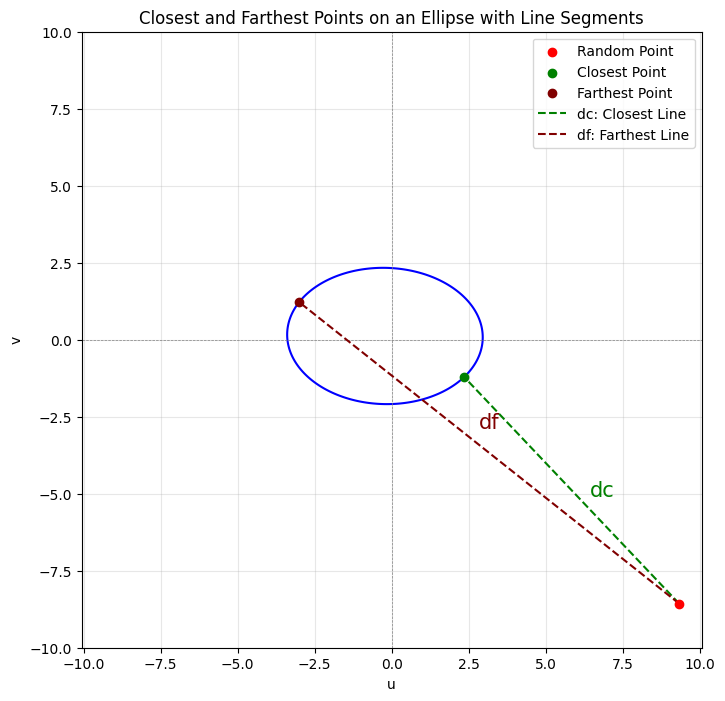

Exiting the program.


In [ ]:
def main():
    while True:
        key = input("Press Enter to execute the methods or 'q' to quit...").lower()
        if key == 'q':
            print("Exiting the program.")
            break
        # Execute all steps
        A, B, C, D, E, F = generate_random_ellipse_parameters()
        u0, v0 = generate_random_point_outside_ellipse(A, B, C, D, E, F)
        closest_point, farthest_point = closest_and_farthest_points_on_ellipse(A, B, C, D, E, F, u0, v0)
        plot_results_with_line(A, B, C, D, E, F, u0, v0, closest_point, farthest_point)

if __name__ == "__main__":
    main()
